In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('C:/Users/NOVATEC/Desktop/metadata_establecimientos.csv', sep=',', encoding='latin1')

Detección de outliers

Se crea una función para la detección de outliers. Solo se van a buscar estos valores en las columnas de 'num_of_rating', 'avg_rating'. Al representar un porcentaje de 4.52% en la columna de 'avg_rating', estamos dentro del limite para poder eliminar de nuestra muestra estos valores

In [3]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [4]:
columns=['avg_rating']
df_2=remove_outliers(df, columns)

In [5]:
df_2=df_2.drop(columns=['Unnamed: 0'])

Graficos

Se analiza mediante el uso de gráficos la información presente en nuestro DataFrame, cabe recalcar que, debido a la magnitud de nuestrso datos se estará trabajando con un top 10, esto es para mejorar el performance del código y una mejor visualización para este EDA. 

Se presenta un grafico de barras que muestra las 10 categorías con el mayor número de reseñas(num_of_reviews). Las barras representan el número total de reseñas para cada una de estas categorías, con las categorías en el eje x y el número de reseñas en el eje y. En este ejercicio se aprecia que la categoría de Restaurant que más reseñas tiene junto con Dentist, esto nos habla que para los datos que tenemos existe mayor presencia de estas dos categorias.

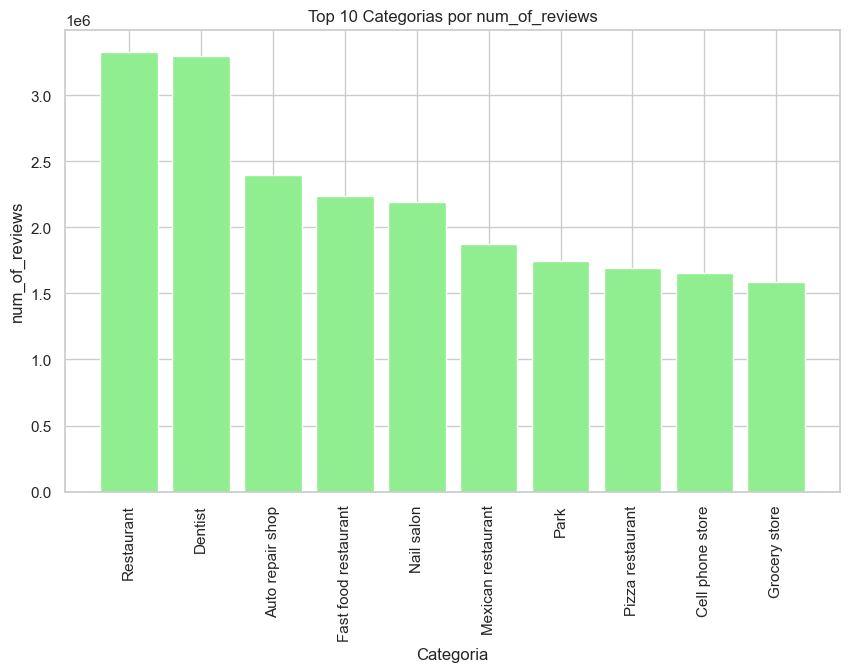

In [44]:
grouped_num_of_reviews=df_2.groupby('category')['num_of_reviews'].sum().reset_index()
top_10_num_of_reviews=grouped_num_of_reviews.sort_values(by='num_of_reviews', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_num_of_reviews['category'], top_10_num_of_reviews['num_of_reviews'], color='lightcoral')
plt.xlabel('Categoria')
plt.ylabel('num_of_reviews')
plt.title('Top 10 Categorias por num_of_reviews')
plt.xticks(rotation=90)
plt.show()

A continuación se observa un gráfico que proporciona una visualización de las 10 categorías más frecuentes en el DataFrame, mostrando cuál es la más común y cuáles son las menos comunes entre estas 10. En cuanto a la interpretación, Restaurant se mantiene mientras que Dentist baja y Auto Repair aparece; este fenómeno nos indica que existe una presencia de Auto Repair, sin embargo, no tiene tantas reseñas como Dentist, mientras que esta útlima a pesar de no estar tan presente, tiene mayor número de reseñas. 

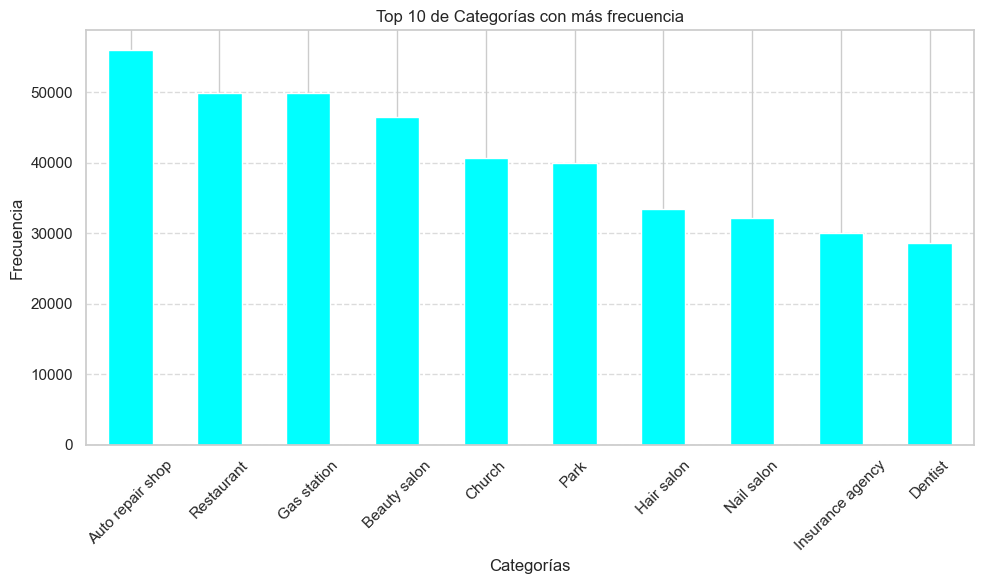

In [62]:
top_10=df_2['category'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar', color='cyan')
plt.title('Top 10 de Categorías con más frecuencia')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El siguiente gráfico proporciona una visualización del promedio de rating para los nombres que tienen el mayor número de reseñas en el DataFrame. Permite ver cuáles de los nombres más comentados tienen un rating más alto o más bajo, facilitando la comparación entre ellos.

C:\Users\NOVATEC\AppData\Local\Temp\ipykernel_15364\4056042492.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_df, x='name', y='avg_rating', palette='viridis')


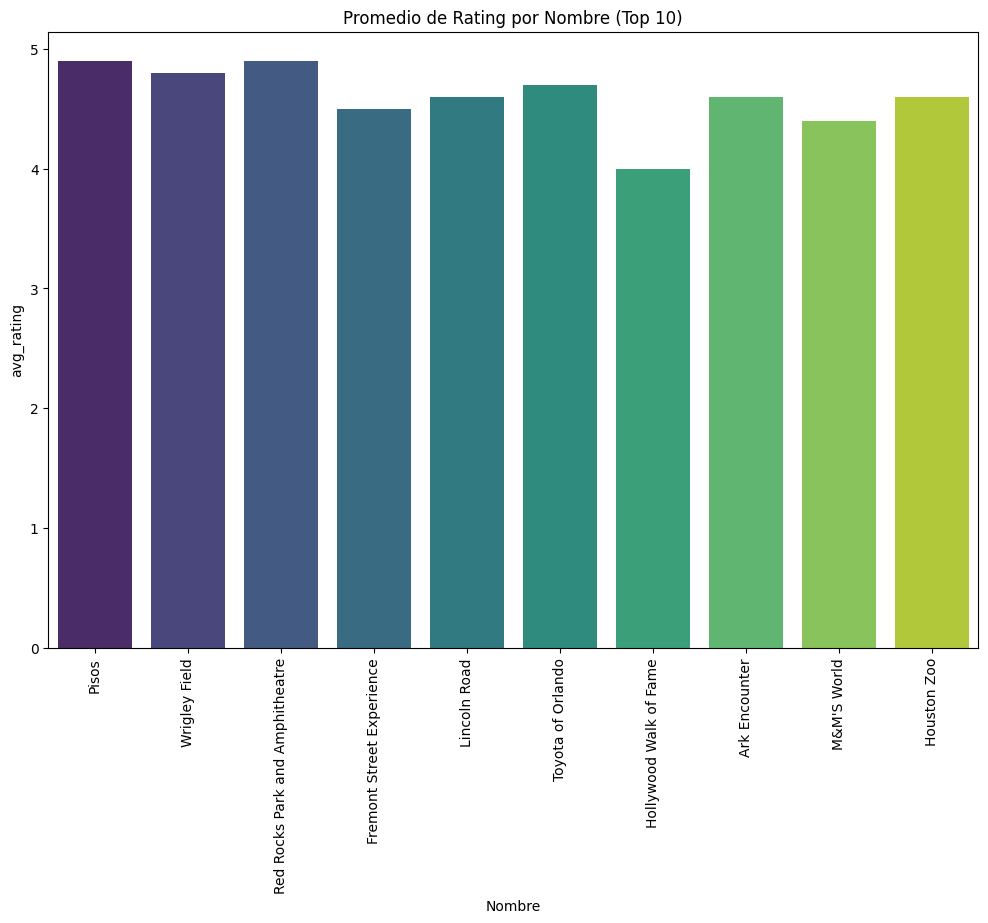

In [22]:
top_10_df=df_2.nlargest(10, 'num_of_reviews')
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_df, x='name', y='avg_rating', palette='viridis')
plt.xlabel('Nombre')
plt.ylabel('avg_rating')
plt.title('Promedio de Rating por Nombre (Top 10)')
plt.xticks(rotation=90)
plt.show()

Para este ejercicio se utilizó la mimsma metodología para la elaboración del grafico, cambiando la columna 'name' por 'category' para ver una comparartiva por categoría. El punto más visible de este gráfico es que las categorías con mayor reseñas y mayor frecuencia no están presentes aquí; nos habla de que las categorías presentes en este ejercicio pueden tener un mayor promedio debido a que no tienen tabta presencia, lo que puede elevar su rating.

C:\Users\NOVATEC\AppData\Local\Temp\ipykernel_15364\1720663498.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_df, x='category', y='avg_rating', palette='viridis')


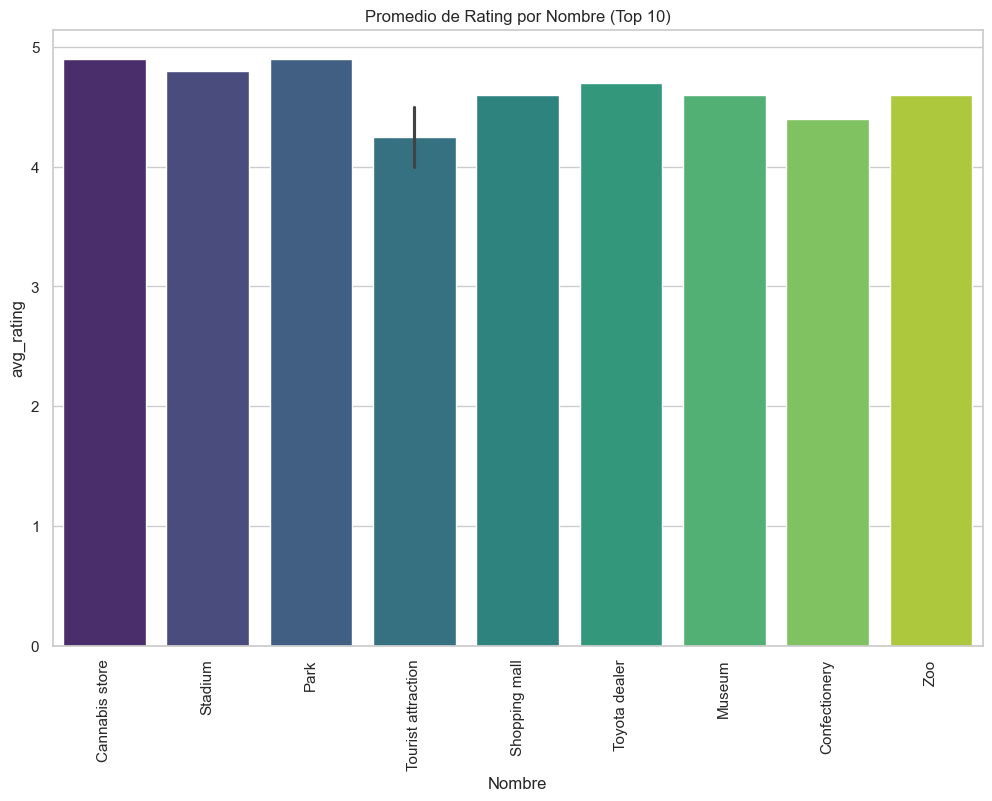

In [45]:
top_10_df=df_2.nlargest(10, 'num_of_reviews')
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_df, x='category', y='avg_rating', palette='viridis')
plt.xlabel('Categoría')
plt.ylabel('avg_rating')
plt.title('Promedio de Rating por Categoría (Top 10)')
plt.xticks(rotation=90)
plt.show()

Se muestra un gráfico en donde se aprecia cómo se distribuyen los valores de avg_rating, mostrando tanto la frecuencia de cada rango de ratings como la forma general de la distribución. La curva KDE proporciona una visión más suave y continua de la distribución, complementando la información que ofrece el histograma. La mayoría de valores de esta columna se encuentran en 4.6 y vemos un sesgo que nos indica ese vacío de valores entre 4.1 y 4.3.

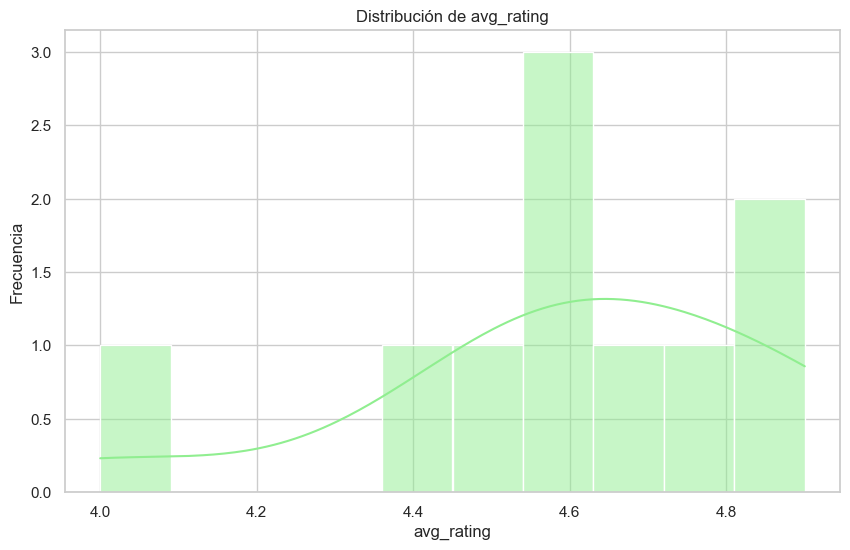

In [42]:
top_10=df_2['avg_rating'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.histplot(top_10_df['avg_rating'], bins=10, kde=True, color='lightgreen')
plt.xlabel('avg_rating')
plt.ylabel('Frecuencia')
plt.title('Distribución de avg_rating')
plt.show()

Insights

1.- La mayoria de los valores se encuentran en 4.6 de rating

2.- Existen categorías que tienen mejor rating que las que tienen más reseñas y frecuencia

3.- Restaurant y Dentist son las categorías que más reseñas tienen

4.- Auto Repair es la categoría que más frecuencia presenta

5.- Restaurant es la categoría que tiene un mayor promedio de presencia dentro de todo el dataset

Conclusiones

La presencia de una cantidad considerable de categorias nos priva de conocer patrones en las categorías menos presentes, sin embargo, el considerar las de mayor frecuencia nos brinda información acerca de lo que está pasando con ells. Es bien sabido que los lugares que más es calificada por los usuarios es la de Restaurant; aunque también existen otras que buen número de reseñas y pueden ser objtos de estudio para que se haga más a profundidad.